**Tutorial 7 - Monte Carlo Calculation $\pi$**

Here we will do a little warm up exercise in Monte Carlo calculations.


1) Imagine a circle circumscribed by a square.  The probability of a random point within the square being inside the circle is equal to the ratio of the area of the circle to the area of the square.  Use a uniform random number generator to calculate the value of $\pi$.  Use 1,000 and 10,000 points.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
## return the number of points within circle
def fun(points):
    n=0
    for i in range (points):
        x=random.uniform(0.0,1.0)
        y=random.uniform(0.0,1.0)
        if x**2+y**2<1:
            n=n+1
    return float(n)
a=fun(1000)
b=fun(10000)
pi_1=4*a/1000
print('the value of  π using 1,000 points is',str(pi_1))
pi_2=4*b/10000
print('the value of  π using 10,000 points is',str(pi_2))


the value of  π using 1,000 points is 3.172
the value of  π using 10,000 points is 3.1332


2) Repeat the calculations above in a loop and record the values of $\pi$.  Make a histogram of your calculated $\pi$ values.  What is the variance of your estimate of $\pi$ using 1,000 and 10,000?  How does it scale with the number of points?

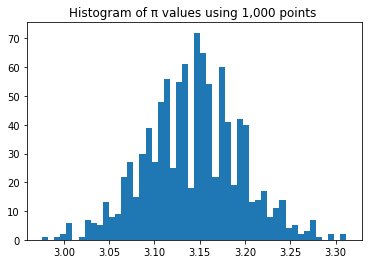

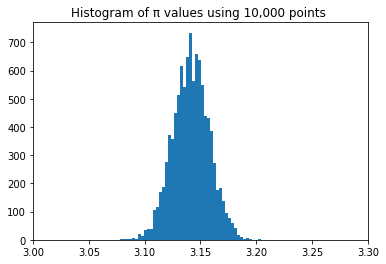

the variance of the estimate of π using 1,000 points is 0.0027752633440000026
the variance of the estimate of π using 10,000 points is 0.00026561746943359996


In [4]:
def pi_value(points):
    n=0
    p=[]
    for i in range(points):
        ans=fun(points)
        p.append(4*ans/float(points))
    return p


v=pi_value(1000)
plt.hist(v,bins=50)
plt.title('Histogram of π values using 1,000 points ')
plt.show()

n=pi_value(10000)
plt.hist(n,bins=50)
plt.xlim(3.0,3.3)
plt.title('Histogram of π values using 10,000 points ')
plt.show()

var_1=np.var(v)
print('the variance of the estimate of π using 1,000 points is', str(var_1))
var_2=np.var(n)
print('the variance of the estimate of π using 10,000 points is', str(var_2))




3) What was done above in two dimensions can be done in more dimensions.  Calculate the volume of a 5 dimensional ball of unit radius in the same way.  Calculate its variance of your estimate in the same way.  Use enough points to get three significant figures.

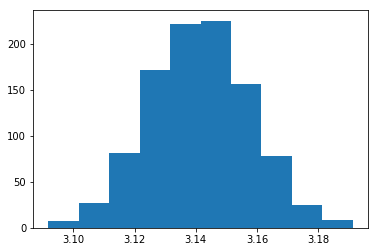

the variance of the estimate of π using 30,000 points is 0.00026544653647758877


In [12]:
import math
trials=100
def pi_(dim,points):
    n=0
    p = np.random.uniform(0.0, 1.0, (dim,points))
    s=np.sqrt([np.sum(p[:,i]**2) for i in range(points)])
    for value in s:
        if value<1.0:
            n=n+1
    return 4.*(float(math.gamma(5/2+1))*float(n)/float(points))**(2/5)

def pi_array(points,trials):
    val=np.empty(trials)
    for i in range(trials):
        np.append(val,pi_(5,points))
    return val
    
bb=np.array([pi_(5,30000) for i in range(1000)])

plt.hist(bb)
plt.show()
print('the variance of the estimate of π using 30,000 points is', str(np.var(bb)))




